In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import zipfile
import tempfile
from google.colab import files

# Upload a zip file from your local system
uploaded = files.upload()

# Create a temporary directory to extract the files
temp_dir = tempfile.mkdtemp()

# Code via ChatGPT to unzip the archive into a temporary directory
for filename in uploaded.keys():
    # Construct the path to the uploaded file
    uploaded_file_path = os.path.join(temp_dir, filename)

    # Write the uploaded file to the temporary directory
    with open(uploaded_file_path, 'wb') as f:
        f.write(uploaded[filename])

    # Check if the file is a zip file
    if zipfile.is_zipfile(uploaded_file_path):
        # Extract the zip file into the temporary directory
        with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
            zip_ref.extractall(temp_dir)
        print('Extracted file "{name}"'.format(name=filename))
    else:
        print('Uploaded file "{name}" is not a zip file'.format(name=filename))

# List the files in the temporary directory
print('Files in temporary directory:', os.listdir(temp_dir))

Saving diabetes-archive.zip to diabetes-archive (2).zip
Extracted file "diabetes-archive (2).zip"
Files in temporary directory: ['diabetes-archive (2).zip', 'diabetes.csv']


In [ ]:
df = pd.read_csv(temp_dir + "/diabetes.csv", index_col="patient_number")

In [ ]:
df["diabetes"]

patient_number
1      No diabetes
2      No diabetes
3      No diabetes
4      No diabetes
5      No diabetes
          ...     
386    No diabetes
387       Diabetes
388    No diabetes
389       Diabetes
390    No diabetes
Name: diabetes, Length: 390, dtype: object

In [ ]:
# Columns that need decimal conversion
columns_with_comma_decimal = ['chol_hdl_ratio', 'bmi', 'waist_hip_ratio']
for column in columns_with_comma_decimal:
    df[column] = df[column].astype(str).str.replace(',', '.').astype(float)

# Encode the 'gender' column
df['gender'] = df['gender'].map({'male': 0, 'female': 1})

# Encode the 'diabetes' column
df['diabetes'] = df['diabetes'].map({'No diabetes': 0, 'Diabetes': 1})

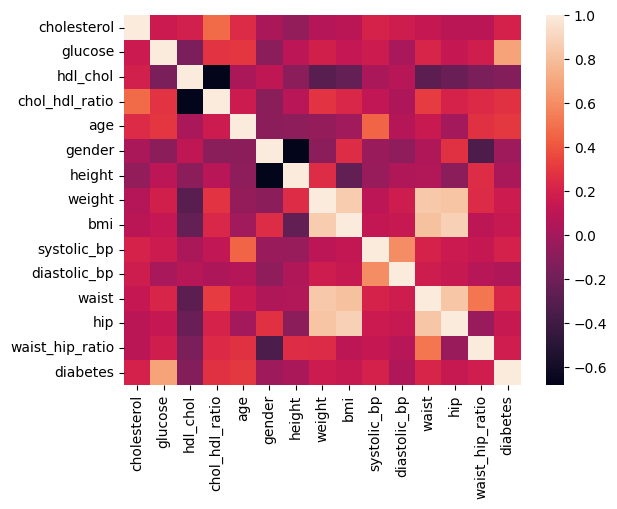

In [ ]:
sns.heatmap(df.corr());

In [ ]:
!pip install mixed-naive-bayes
from mixed_naive_bayes import MixedNB

In [ ]:
df.dtypes

cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender               int64
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes             int64
dtype: object

In [ ]:
#Seperate out the Target and Features
y = df["diabetes"]
X = df.drop("diabetes", axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Naive Bayes classifier - Mixed because there is a combination of continuous and categorical features
clf = MixedNB(categorical_features=[X.columns.get_loc("gender")])

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9230769230769231


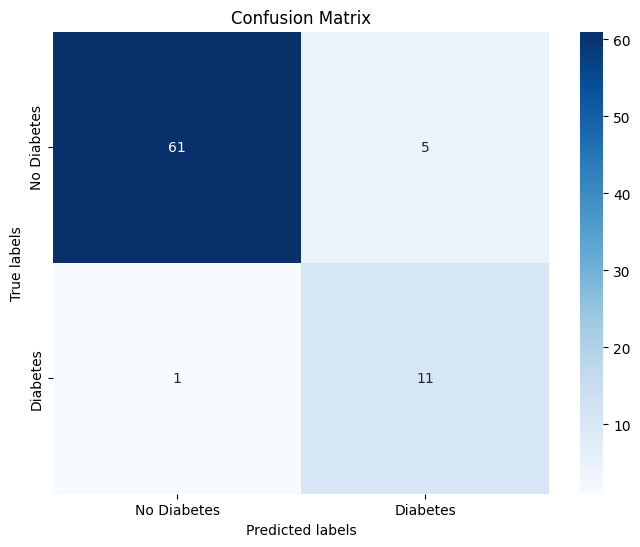

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the matrix
target_names = ["No Diabetes", "Diabetes"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

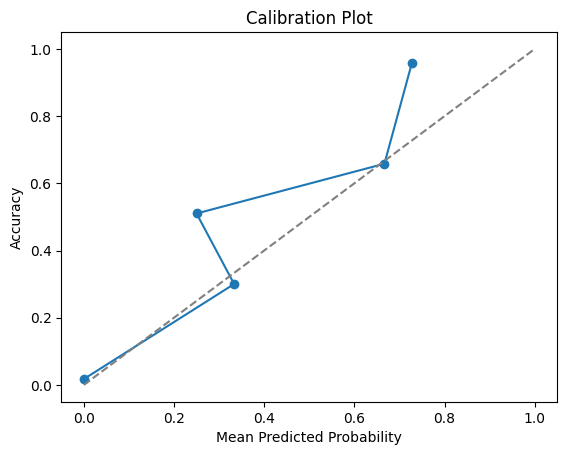

In [ ]:
from sklearn.calibration import calibration_curve

# Generate predicted probabilities on the test set
probabilities = clf.predict_proba(X_test)[:, 1]

# Group predictions into bins and calculate mean probability and accuracy
mean_predicted_prob, accuracy = calibration_curve(y_test, probabilities, n_bins=5, strategy='uniform')

# Plot calibration curve
plt.plot(mean_predicted_prob, accuracy, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for reference
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Accuracy')
plt.title('Calibration Plot')
plt.show()